# TODAY!
## 1. Brief (and biased) overview of ML
## 2. ML vs Econometrics: how are they similar? How are they different
## 3. "Traditional ML": What is it? What is is good at? When does it fail?
## 4. Deep learning: What is it? When is it useful?
## 5. Delicious examples

In [32]:
! cat ../requirements.txt

numpy
scipy
pandas
matplotlib
pydot
keras
tensorflow
scikit-learn
jupyter
jupyterlab



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Machine Learning
#### This is a very brief survey of machine learning (not meant to be comprehensive)

# A definition:
 "Machine learning is the field of study that gives computers the ability to learn without being explicitly programmed"
     - Arthur Samuel, 1959


## A few distinctions:
 - ### Supervised vs unsupervised
 - ### Model based vs instance based
 - ### Online vs offline



### Supervised ML
Learning a mapping of inputs to outputs. We have examples of both and we find algorithms that can lean this mapping from examples.
Examples: 
 - Linear regression
 - Logistic regression
 - Decision trees
 - Boosted trees (are awesome)
 - Support vector machines
 
### Unsupervised ML
Look at data and find patterns. 
Most of the world's data do not have associated labels. 
Examples:
 - clustering (e.g. kmeans)
 - Principle component analysis and singular value decomposition
 - Manifold learning
 
 


## Model based:
 - impose a model on the world 

## Instance base
 - learn similarities and compare to known instances
 

## Why do I care?
 - Does the hypothesis space grow with the number of training examples?

<Figure size 1152x864 with 0 Axes>

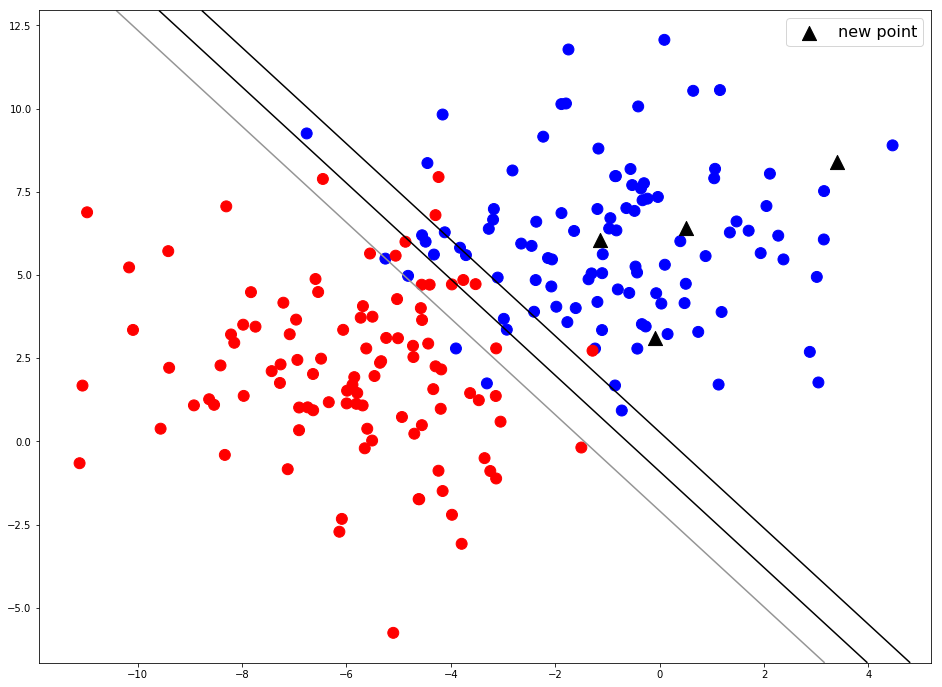

In [3]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from matplotlib.patches import Circle


x, y = make_blobs(n_samples=200, cluster_std=2.3, centers=2, random_state=1234)
colormap = 'rb'
colors = [colormap[label] for label in y]

plt.figure(figsize=(16,12))
f, ax = plt.subplots(figsize=(16, 12))
ax.scatter(x[:, 0], x[:,1], c=colors, s=120)

lr = LogisticRegression()
lr.fit(x, y)


x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.mgrid[x_min:x_max:.05, y_min:y_max:.05]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = lr.predict_proba(grid)[:, 1].reshape(xx.shape)

ax.contour(xx, yy, probs, levels=[.25, .5, .75], cmap="Greys", vmin=0, vmax=.5)

new_points = grid[np.random.choice(np.arange(grid.shape[0]), 4)]
ax.scatter(new_points[:, 0], new_points[:, 1], c='k', marker='^', s=200, label='new point')
plt.legend(fontsize=16)

Text(0.5,1,'\nWhen we encounter new points do we:\n    compare them to the model we have learned\n    compare them to their neighbors with some learned distance metric\n')

<Figure size 1152x864 with 0 Axes>

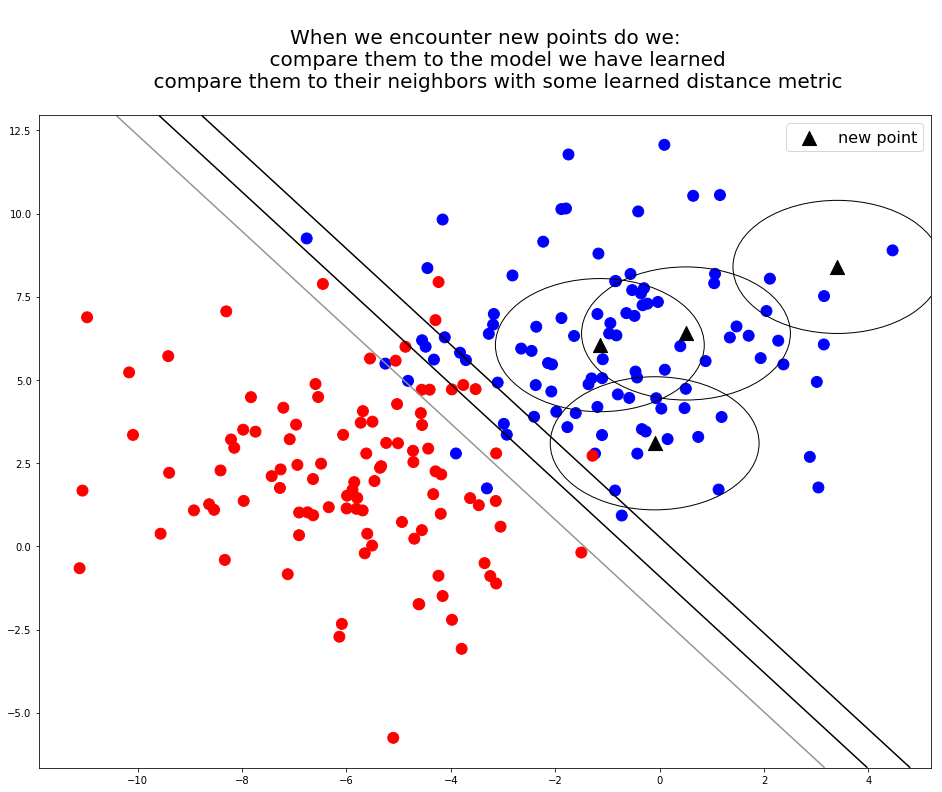

In [4]:
plt.figure(figsize=(16,12))
f, ax = plt.subplots(figsize=(16, 12))
ax.scatter(x[:, 0], x[:,1], c=colors, s=120)

lr = LogisticRegression()
lr.fit(x, y)


x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.mgrid[x_min:x_max:.05, y_min:y_max:.05]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = lr.predict_proba(grid)[:, 1].reshape(xx.shape)

ax.contour(xx, yy, probs, levels=[.25, .5, .75], cmap="Greys", vmin=0, vmax=.5)


ax.scatter(new_points[:, 0], new_points[:, 1], c='k', marker='^', s=200, label='new point')
for new_point in new_points:
    c = Circle(new_point, radius=2)
    c.set_edgecolor('black')
    c.set_facecolor('none')
    ax.add_artist(c)
plt.legend(fontsize=16)

txt = '''
When we encounter new points do we:
    compare them to the model we have learned
    compare them to their neighbors with some learned distance metric
'''
plt.title(txt, fontsize=20)

# Online vs offline ML
## Online
 - The learning can "continue" as new data are available
 
## Offline
 - All the learning must happen at once.
 

# Example: 
## Ordinary least squares
 - solve for coeffiecients by inverting a matrix (or PseudoInverse)
# $ M = \left[ \begin{smallmatrix} 1 & 2 & 3 & 4 \\ 5 & 6 & 7 & 8 \\ 
                                   1 & 2 & 3 & 4 \\ 5 & 6 & 7 & 8 \\ 
                                   4 & 8 & 2 & 2 \\ 43 & 12 & 12 & 1 \\
                                   -1 & 6 & 5 & 0 \\ 11 & 1 & 7 & 7
                                   \end{smallmatrix} \right] $
 - If we add rows we have to begin the computation again

## Naive Bayes
# $ P\left(y | x_{1},... x_{n} \right) \propto P_{0}(y) \prod_{i=1}^{N}P\left(x_{i}|y\right)$
 - If we collect more data ($x_{i}$) then we will just multiply our old result with the new terms

## We will focus on 
 - ### Supervised ML (we have examples with known answers)
 - ### Model based ML (we are looking for a function to map X to y)
 - ### Online ML (we can train on __subsets__ of the data)


# Detour: ML vs econometrics!
(NOTE: this is my biased view of the world)

## GO TO SLIDES

# Back to ML

# Example: Some students take a final exam
### We poll students to find out how much they studied for a final exam and whether they passed.

Text(0,0.5,'Pass/Fail')

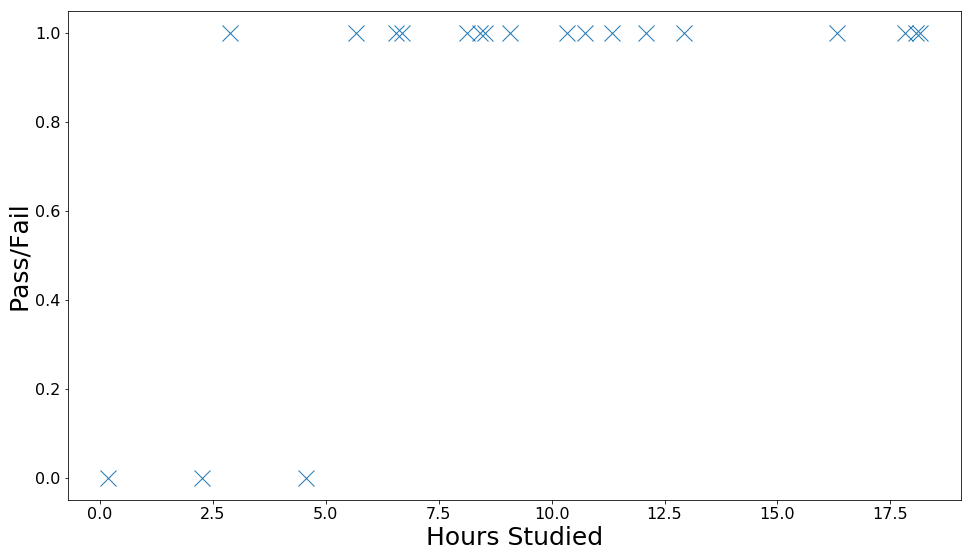

In [5]:
np.random.seed(1234)
x = np.linspace(-.5, 20, 512)
y = 1 / (1 + np.exp(-1 * (x - 8)))
passfail = ((y + np.random.rand(y.shape[0])) > 0.5).astype(int)
rand_index = np.random.choice(np.arange(y.shape[0]), 20)
pd.Series(passfail, index=x).iloc[rand_index].plot(figsize=(16,9), linewidth=6, fontsize=16, style='x', markersize=16)
plt.xlabel('Hours Studied', fontsize=25)
plt.ylabel('Pass/Fail', fontsize=25)

## Proposed model: $ \text{PASS/FAIL} = \sigma \left( \theta X + b \right) $

## Loss: $ J(\theta) = -\frac{1}{N}\sum_{i=1}^{N} p_{i}  log\left(\hat{p}_{i}\right) + \left(1-p_{i}\right) log\left(1 -\hat{p}_{i}\right)  $

### where  
 ### - $N$ is the number of samples
 ### - $p_{i}$ is whether $i^{th}$ student passed (1 for pass, 0 for fail)
 ### - $\hat{p}_{i}$ is the predicted value for passing for observation $i$.

## Task: find $\theta$ such that $J\left( \theta \right)$ is minimized

Text(0,0.5,'Pass/Fail')

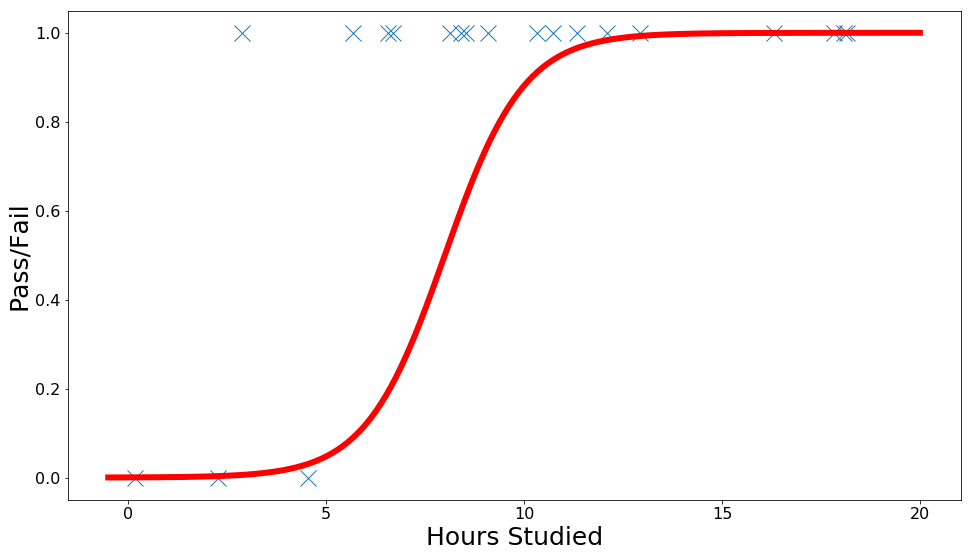

In [6]:
ax = pd.Series(passfail, index=x).iloc[rand_index].plot(figsize=(16,9), linewidth=6, fontsize=16, style='x', markersize=16)
pd.Series(y, index=x).plot(linewidth=6, fontsize=16, ax=ax, style='r')
plt.xlabel('Hours Studied', fontsize=25)
plt.ylabel('Pass/Fail', fontsize=25)

## In general the task may be more complicated:
 - ### Multiple classes
 - ### Multiple inputs


## Imagine a more complicated problem:
 - ### Hours studied broken down by day
 - ### Hours slept
 - ### Whether the student took the prerequisite course
 - ### Calories consumed for breakfast

### $ P\left(\text{pass}\right) = f\left(T_{studied}, T_{sleep}, \text{prerequisite}_{y/n}, \text{Calories}  \right)$


### We want to find
### $P\left(\text{Pass} | T_{studied}, T_{sleep}, \text{prerequisite}_{y/n}, \text{Calories}\right)$

# Logistic Regression

## Model: $ \hat{y} = \sigma \left( \theta^{T}X + b \right) $

## Loss: $ J(\theta) = -\frac{1}{N}\sum_{i=1}^{N} \sum_{j=1}^{M}{y_{i}  log\left(p_{i,j}\right)}  $
### where  
 ### - $N$ is the number of samples
 ### - $M$ is the number of classes
 ### - $y_{i}$ is the $i^{th}$ label
 ### - $p_{i,j}$ is the predicted probability that observation $i$ is of class $j$.
 ### - $\theta$ and $X$ are matrices!

# Logistic regression is
 - ## Very powerful
 - ## A GREAT first model for classification tasks
 - ## Interpretable
 - ## Scratches the itches of (many) ML practitioners and econometricians

# Where does this model-based approach break down?
 - What if our model is wrong? 
 - We cannot learn any function in general
 - This will satisfy the econometricians, but not (all) the ML practitioners.
 
# We need to add some non-linearity if we want to learn arbitrary functions


## Example: Or gate
### We will use logistic regression to model an "OR" operation

In [7]:
import numpy as np
from sklearn.linear_model import LogisticRegression
np.random.seed(1234)
x = np.random.rand(2000, 2) > 0.5
y_or = np.logical_or(x[:, 0], x[:, 1])

columns = ['$x_1$', '$x_2$']
pd.DataFrame(x[:10], columns=columns).join(pd.Series(y_or[:10], name='target $= x_{1}$ or $x_{2}$'))

,$x_1$,$x_2$,target $= x_{1}$ or $x_{2}$
0,False,True,True
1,False,True,True
2,True,False,True
3,False,True,True
4,True,True,True
5,False,True,True
6,True,True,True
7,False,True,True
8,True,False,True
9,True,True,True


Text(0.5,1,'Can I draw a straight line to separate this data?')

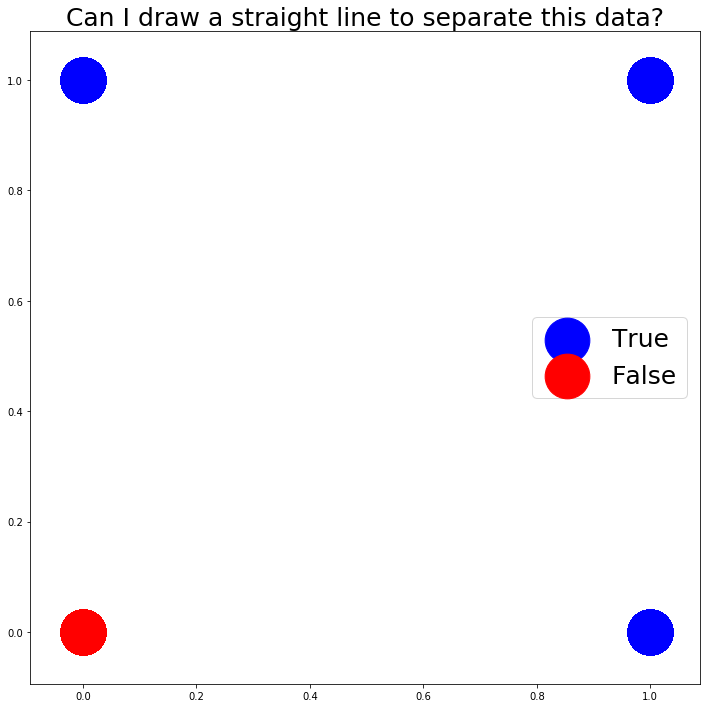

In [40]:
plt.figure(figsize=(12,12))
plt.scatter(x[y_or, 0], x[y_or, 1],c='b', s=2000)
plt.scatter(x[~y_or, 0], x[~y_or, 1], c='r', s=2000)
plt.legend(['True', 'False'], fontsize=25)
plt.title('Can I draw a straight line to separate this data?', fontsize=25)
# xlim = plt.xlim()
# ylim = plt.ylim()
# ax = plt.gca()
# pd.Series([ylim[0] - .1, ylim[1] - .1], index=[xlim[1] - .1, xlim[0] - .1]).plot(linewidth=5, ax=ax)

In [33]:
from sklearn.metrics import accuracy_score
cut = int(0.8 * x.shape[0])
lr = LogisticRegression(C=1e3)
lr.fit(x[:cut], y_or[:cut])
print('Logistric regression accuracy on a noiseless "OR" operation {:.2f}'.format(
    accuracy_score(y_or[cut:], lr.predict(x[cut:]))))

Logistric regression accuracy on a noiseless "OR" operation 1.00


### Exclusive or

In [34]:
# Exclusive or
y_xor = np.logical_xor(x[:, 0], x[:, 1])
pd.DataFrame(x[:10], columns=columns).join(pd.Series(y_xor[:10], name='target $= x_{1}$ xor $x_{2}$'))

,$x_1$,$x_2$,target $= x_{1}$ xor $x_{2}$
0,False,True,True
1,False,True,True
2,True,False,True
3,False,True,True
4,True,True,False
5,False,True,True
6,True,True,False
7,False,True,True
8,True,False,True
9,True,True,False


''

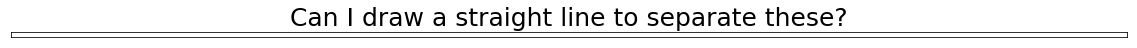

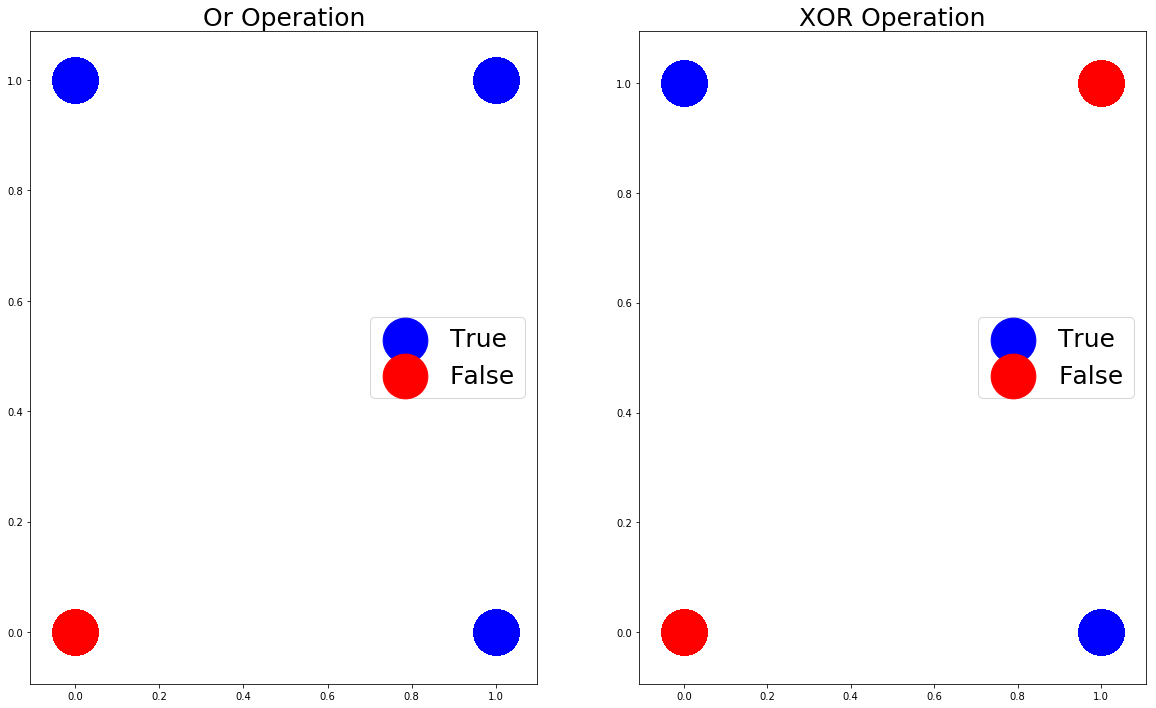

In [50]:
plt.figure(figsize=(20,0.1))
plt.xticks([])
plt.yticks([])
plt.title('Can I draw a straight line to separate these?', fontsize=25)
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,12))
ax1.scatter(x[y_or, 0], x[y_or, 1],c='b', s=2000)
ax1.scatter(x[~y_or, 0], x[~y_or, 1], c='r', s=2000)
ax1.legend(['True', 'False'], fontsize=25)
ax1.set_title('Or Operation', fontsize=25)

ax2.scatter(x[y_xor, 0], x[y_xor, 1],c='b', s=2000)
ax2.scatter(x[~y_xor, 0], x[~y_xor, 1], c='r', s=2000)
ax2.legend(['True', 'False'], fontsize=25)
ax2.set_title('XOR Operation', fontsize=25)
;

In [43]:
lr = LogisticRegression(C=1e3)
lr.fit(x[:cut], y_xor[:cut])
print('Logistric regression accuracy on a noiseless "XOR" operation {:.2f}'.format(
    accuracy_score(y_xor[cut:], lr.predict(x[cut:]))))


Logistric regression accuracy on a noiseless "XOR" operation 0.51


## We need non-linearity and interaction to model complex behavior

# GO TO SLIDES

# Summary:
# Questions

In [13]:
# Safe to restart notebook here

# Now for some examples with real code! 

# Classifying hand-written digits

## This is a classic ML problem

In [1]:
import numpy as np
import pandas as pd
%pylab inline

from keras.datasets import mnist

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:

mnist.load_data?

Signature: mnist.load_data(path='mnist.npz')
Docstring:
Loads the MNIST dataset.

# Arguments
    path: path where to cache the dataset locally
        (relative to ~/.keras/datasets).

# Returns
    Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.
File:      ~/sloan-course/sloan-env/lib/python3.6/site-packages/keras/datasets/mnist.py
Type:      function


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [4]:
num_classes = np.unique(y_test).shape[0]
num_classes

10

3


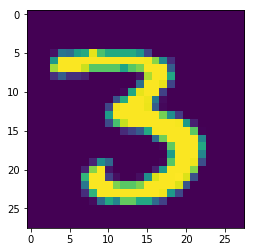

In [5]:
plt.imshow(x_train[12, :, :])
print(y_train[12])

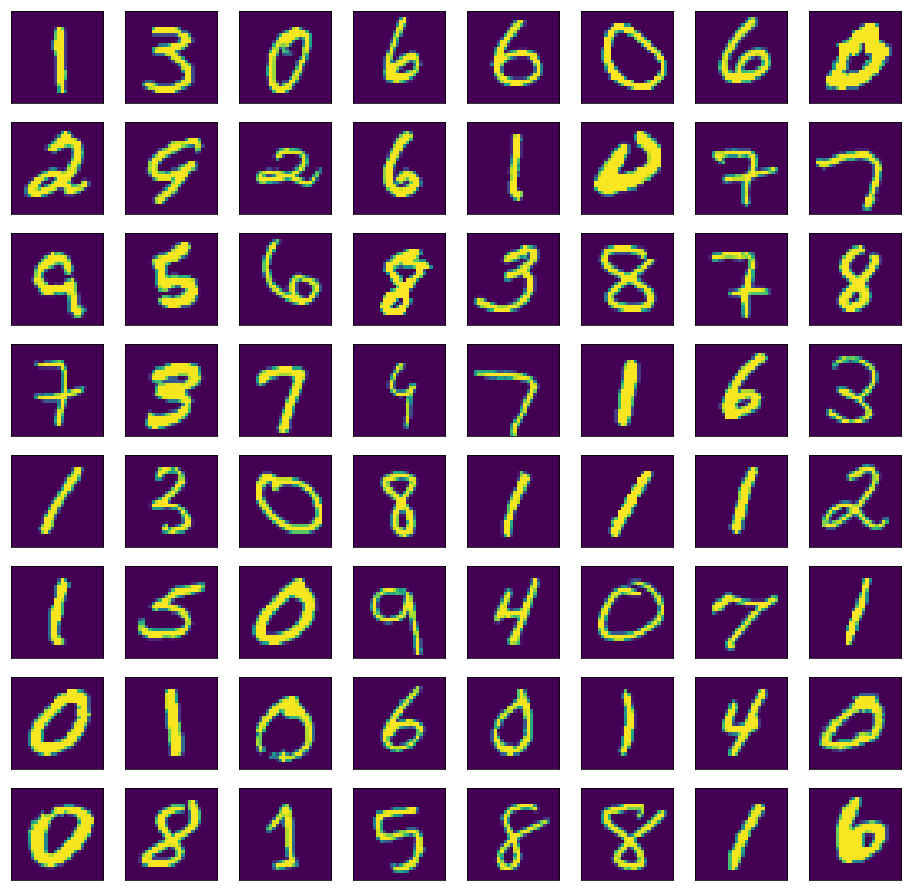

In [6]:
np.random.seed(1234)
nrows, ncolumns = 8, 8
f, ax = plt.subplots(nrows, ncolumns, figsize=(16,16))
digit_inds = np.random.choice(np.arange(x_train.shape[0]), nrows * ncolumns)
i = 0
for row in range(nrows):
    for col in range(ncolumns):
        ax[row, col].imshow(x_train[digit_inds[i]])
        ax[row, col].set_xticks([])
        ax[row, col].set_yticks([])
        i += 1

In [7]:
 x_train.min(), x_train.max()

(0, 255)

In [8]:
x_train[13]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  38, 222, 225,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 147, 234, 252, 176,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         23, 197, 253, 252, 208,  19,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,
        178, 252, 253, 117,  65,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [9]:
y_train[12:14]

array([3, 6], dtype=uint8)

In [10]:
from keras.utils import to_categorical
def preprocess_training_data(data):
    data = data.reshape(data.shape[0], data.shape[1] * data.shape[2])
    data = data.astype('float32') / 255
    return data

def preprocess_targets(target, num_classes):
    return to_categorical(target, num_classes)


x_train = preprocess_training_data(x_train)
x_test = preprocess_training_data(x_test)
print(x_train.shape)

y_train_ohe = preprocess_targets(y_train, num_classes)
y_test_ohe = preprocess_targets(y_test, num_classes)



(60000, 784)


In [11]:
train_frac = 0.8
cutoff = int(x_train.shape[0] * train_frac)
x_train, x_val = x_train[:cutoff], x_train[cutoff:]
y_train, y_val = y_train[:cutoff], y_train[cutoff:]
y_train_ohe, y_val_ohe = y_train_ohe[:cutoff], y_train_ohe[cutoff:]

# Logistic Regression:

## Model: $ \hat{y} = \sigma \left( \theta^{T}X + b \right) $

## Loss: $ J(\theta) = -\frac{1}{N}\sum_{i=1}^{N} \sum_{j=1}^{m}{y_{i} * log\left(p_{i,j}\right)}  $
### where  
 # - $N$ is the number of samples
 # - $M$ is the number of classes
 # - $y_{i}$ is the $i^{th}$ label
 # - $p_{i,j}$ is the predicted probability that observation $i$ is of class $j$.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [13]:
%%time
lr = LogisticRegression()
lr.fit(x_train, y_train)

CPU times: user 52.5 s, sys: 156 ms, total: 52.6 s
Wall time: 52.7 s


## How many parameters are there in this model?

# How did we do?
## Inspect the model in several ways
 ### - look at the weights (coefficients)
 ### - look at out of sample performance (accuracy, f1)
 ### - look at confusion matrix

In [14]:
lr_preds = lr.predict(x_test)
print('accuracy {:.2f}\nf1 micro score {:.2f}'.format(accuracy_score(y_test, lr_preds), f1_score(y_test, lr_preds, average='micro')))
print ('\n\n')
pd.DataFrame(confusion_matrix(y_test, lr_preds, labels=lr.classes_)).rename_axis('True Label').rename_axis('Predicted Label', axis=1)

accuracy 0.92
f1 micro score 0.92





Predicted Label,0,1,2,3,4,5,6,7,8,9
True Label,,,,,,,,,,
0,961,0,1,2,0,4,6,2,2,2
1,0,1113,2,1,0,1,4,1,13,0
2,7,9,921,19,11,5,10,9,37,4
3,4,1,22,915,3,23,4,12,19,7
4,1,3,3,4,918,0,9,2,7,35
5,9,3,1,37,10,771,17,7,29,8
6,11,3,5,2,5,16,912,0,4,0
7,3,7,21,6,8,2,1,946,5,29
8,9,12,7,23,12,30,8,13,850,10


In [15]:
lr_coefs = pd.DataFrame(lr.coef_.T)
lr_coefs[1].loc[lr_coefs[1].abs().sort_values(ascending=False).index].head(15)

710   -2.371464
621    2.137186
711   -2.106646
248   -2.077707
715   -1.958213
740   -1.845511
716   -1.776593
510   -1.757067
95    -1.722163
537   -1.629915
565   -1.623278
286   -1.616617
94    -1.615246
718   -1.604423
520   -1.583674
Name: 1, dtype: float64

## Now we do the same with keras

In [16]:
from keras.models import Model, Input
from keras.layers import Dense, Softmax, Dropout
from keras.regularizers import l1_l2
from keras.optimizers import RMSprop
import keras.backend as K

K.clear_session()
digit_input = Input(shape=(x_train.shape[1],))
reg = l1_l2(l1=0.0, l2=0.001)
output = Dense(num_classes, activation='sigmoid', kernel_regularizer=reg, )(digit_input)
model = Model(digit_input, output)

model.compile(optimizer=RMSprop(lr=2e-3, decay=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])


## How many parameters does our model have? 
 - ### The weight matrix is 784 x 10
 - ### There is 10 bias terms
 ### = 7850

In [17]:
model.count_params()


7850

In [18]:
## fit the model! 

In [19]:
model.fit(x_train, y_train_ohe, batch_size=512, validation_data=(x_val, y_val_ohe), epochs=10, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 0s 10us/step - loss: 0.9754 - acc: 0.7998 - val_loss: 0.5381 - val_acc: 0.8812
Epoch 2/10
48000/48000 [==============================] - 0s 6us/step - loss: 0.5021 - acc: 0.8895 - val_loss: 0.4410 - val_acc: 0.9072
Epoch 3/10
48000/48000 [==============================] - 0s 6us/step - loss: 0.4521 - acc: 0.9017 - val_loss: 0.4235 - val_acc: 0.9103
Epoch 4/10
48000/48000 [==============================] - 0s 7us/step - loss: 0.4385 - acc: 0.9072 - val_loss: 0.4162 - val_acc: 0.9143
Epoch 5/10
48000/48000 [==============================] - 0s 7us/step - loss: 0.4330 - acc: 0.9099 - val_loss: 0.4166 - val_acc: 0.9133
Epoch 6/10
48000/48000 [==============================] - 0s 6us/step - loss: 0.4296 - acc: 0.9108 - val_loss: 0.4164 - val_acc: 0.9130
Epoch 7/10
48000/48000 [==============================] - 0s 6us/step - loss: 0.4277 - acc: 0.9119 - val_loss: 0.4110 - val_acc: 0.91

### How do we see how well the model is doing?
 - We make predictions on out of sample data

In [20]:
model.predict(x_test[1:3])  # these are probabilities

array([[3.0951856e-03, 4.7901733e-05, 1.8547110e-01, 3.0310927e-03,
        3.4626186e-08, 4.8842835e-03, 1.3439807e-02, 1.4692219e-08,
        1.6518687e-03, 5.0576926e-07],
       [2.3037467e-04, 4.7983369e-01, 1.4741981e-02, 5.7029701e-03,
        1.0526192e-03, 3.2404973e-03, 4.9964921e-03, 8.5385963e-03,
        8.8761020e-03, 1.9693812e-03]], dtype=float32)

In [21]:
keras_lr_preds = np.argmax(model.predict(x_test), axis=1)
print('accuracy {:.2f}\nf1 micro score {:.2f}'.format(accuracy_score(y_test, keras_lr_preds), f1_score(y_test, keras_lr_preds, average='micro')))
pd.DataFrame(confusion_matrix(y_test, keras_lr_preds)).rename_axis('True Label').rename_axis('Predicted Label', axis=1)

accuracy 0.92
f1 micro score 0.92


Predicted Label,0,1,2,3,4,5,6,7,8,9
True Label,,,,,,,,,,
0,960,0,1,1,0,7,8,2,1,0
1,0,1107,2,2,1,2,4,2,15,0
2,11,7,903,15,15,2,15,17,40,7
3,5,1,22,891,0,42,3,19,19,8
4,1,3,2,1,909,0,12,2,8,44
5,10,4,1,25,7,785,17,8,26,9
6,10,3,4,1,9,15,912,2,2,0
7,4,11,20,6,6,0,0,951,2,28
8,10,10,6,15,9,35,12,18,851,8


In [22]:
keras_lr_coefs = pd.DataFrame(model.layers[1].get_weights()[0])
keras_lr_coefs[1].loc[keras_lr_coefs[1].abs().sort_values(ascending=False).index].head(15)

465   -0.402521
375   -0.392998
403   -0.383895
493   -0.379429
350    0.372393
402   -0.365673
437   -0.362734
374   -0.355743
628   -0.350697
492   -0.347614
378    0.334323
629   -0.330224
466   -0.324022
322    0.313652
234   -0.306349
Name: 1, dtype: float32

# Now we will add complexity and make a DNN

In [23]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

def plot_model_in_notebook(model):
    return SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))


In [24]:
K.clear_session()
num_hidden_units = 512
digit_input = Input(shape=(x_train.shape[1],))
x = Dense(num_hidden_units, activation='relu',)(digit_input)
output = Dense(num_classes, activation='softmax')(x)
model = Model(digit_input, output)

model.compile(optimizer=RMSprop(lr=2e-3, decay=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])


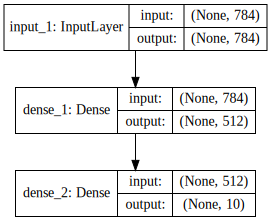

In [25]:
plot_model_in_notebook(model)


## How many parameters does our model have? 
 - ### Layer 1 weight matrix: 784 x 512
 - ### Layer 1 bias terms: 512
 - ### Layer 2 weight matrix: 512 x 10
 - ### layer 2 bias terms: 10
 ### = 784 * 512 + 512 + 512 * 10 + 10 = 407050

In [26]:
784 * 512 + 512 + 512 * 10 + 10 == model.count_params()

True

In [27]:
model.fit(x_train, y_train_ohe, batch_size=128, validation_data=(x_val, y_val_ohe), epochs=20, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 72us/step - loss: 0.2500 - acc: 0.9259 - val_loss: 0.1225 - val_acc: 0.9616
Epoch 2/20
48000/48000 [==============================] - 3s 69us/step - loss: 0.0942 - acc: 0.9705 - val_loss: 0.1137 - val_acc: 0.9651
Epoch 3/20
48000/48000 [==============================] - 3s 68us/step - loss: 0.0620 - acc: 0.9815 - val_loss: 0.0864 - val_acc: 0.9752
Epoch 4/20
48000/48000 [==============================] - 3s 68us/step - loss: 0.0428 - acc: 0.9868 - val_loss: 0.0813 - val_acc: 0.9783
Epoch 5/20
48000/48000 [==============================] - 3s 66us/step - loss: 0.0321 - acc: 0.9899 - val_loss: 0.0810 - val_acc: 0.9782
Epoch 6/20
48000/48000 [==============================] - 3s 66us/step - loss: 0.0237 - acc: 0.9927 - val_loss: 0.0957 - val_acc: 0.9780
Epoch 7/20
48000/48000 [==============================] - 3s 65us/step - loss: 0.0174 - acc: 0.9946 - val_loss: 0.0991 - val_acc

In [28]:
model.history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [29]:
pd.DataFrame(model.history.history).head()

,val_loss,val_acc,loss,acc
0,0.122517,0.961583,0.249979,0.925875
1,0.113650,0.965083,0.094225,0.970542
2,0.086445,0.975167,0.061977,0.981479
3,0.081332,0.978333,0.042789,0.986812
4,0.080976,0.978167,0.032052,0.989917


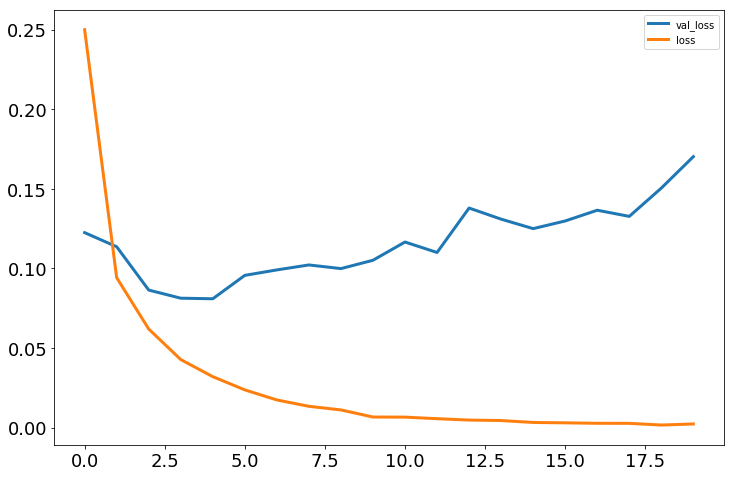

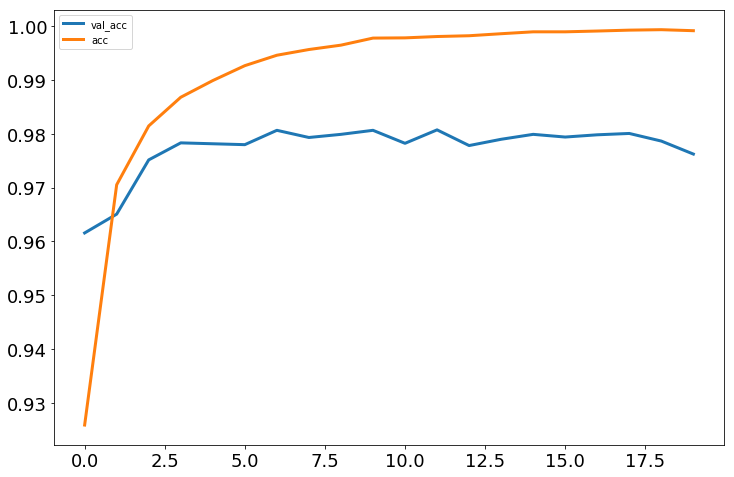

In [30]:
plot_kwargs = {'fontsize': 18, 'linewidth': 3, 'figsize': (12,8)}
pd.DataFrame(model.history.history)[['val_loss', 'loss']].plot(**plot_kwargs)
pd.DataFrame(model.history.history)[['val_acc', 'acc']].plot(**plot_kwargs)

In [31]:
keras_dnn_preds = np.argmax(model.predict(x_test), axis=1)
print('accuracy {:.2f}\nf1 micro score {:.2f}'.format(accuracy_score(y_test, keras_dnn_preds), f1_score(y_test, keras_dnn_preds, average='micro')))
pd.DataFrame(confusion_matrix(y_test, keras_dnn_preds)).rename_axis('True Label').rename_axis('Predicted Label', axis=1)

accuracy 0.98
f1 micro score 0.98


Predicted Label,0,1,2,3,4,5,6,7,8,9
True Label,,,,,,,,,,
0,966,0,0,1,3,0,2,2,4,2
1,0,1098,4,1,0,0,2,1,29,0
2,1,1,1011,2,2,0,2,3,10,0
3,0,0,5,981,1,4,0,5,10,4
4,1,0,1,0,968,0,3,1,2,6
5,2,0,0,6,1,869,4,1,8,1
6,3,2,1,1,5,2,943,0,1,0
7,1,4,11,3,2,0,0,989,13,5
8,0,0,1,2,3,0,0,3,964,1


# Improving the DNN
### Thus far we "blindly" added a big layer and a lot of complexity. 
### We improved the model at lot! 

### We want to add additional complexity, but still have a way to avoid over-fitting

In [32]:
K.clear_session()
num_hidden_units = 512
digit_input = Input(shape=(x_train.shape[1],))
x = Dense(num_hidden_units, activation='relu',name='Dense_1')(digit_input)
for i in range(4):
    x = Dense(num_hidden_units, activation='relu', name='Dense_{}'.format(i + 2))(x)

output = Dense(num_classes, activation='softmax', name='output')(x)
big_model = Model(digit_input, output)

big_model.compile(optimizer=RMSprop(lr=2e-3, decay=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

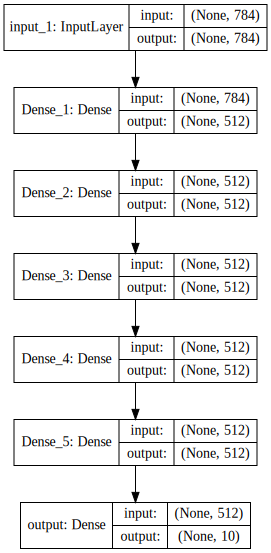

In [33]:
plot_model_in_notebook(big_model)

In [34]:
print(big_model.count_params()), x_train.shape[0]

1457674


(None, 48000)

## Enter dropout!

### Regularization scheme: in any given batch, we will randomly pick some fraction of the neurons and "drop" them

### Cartoon picture: Only the neurons that really matter for training will end up getting trained

### we will start with a dropout probability of 0.2

In [35]:
K.clear_session()
num_hidden_units = 512
digit_input = Input(shape=(x_train.shape[1],), name='digit_input')
x = Dense(num_hidden_units, activation='relu', name='dense_0')(digit_input)
x = Dropout(.2, name='dropout_0')(x)
for i in range(3):
    x = Dense(num_hidden_units, activation='relu', name='dense_{}'.format(i + 2))(x)
    x = Dropout(.2, name='dropout_{}'.format(i + 2))(x)

output = Dense(num_classes, activation='softmax')(x)
model = Model(digit_input, output)

model.compile(optimizer=RMSprop(lr=2e-3, decay=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

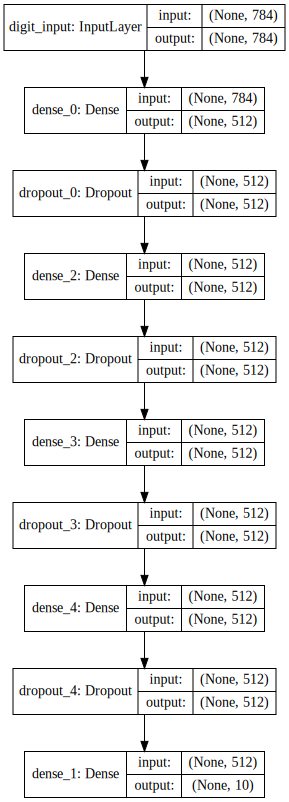

In [36]:
plot_model_in_notebook(model)

In [37]:
model.fit(x_train, y_train_ohe, batch_size=128, validation_data=(x_val, y_val_ohe), epochs=64, shuffle=True, verbose=0)  # notice the verbose kwarg

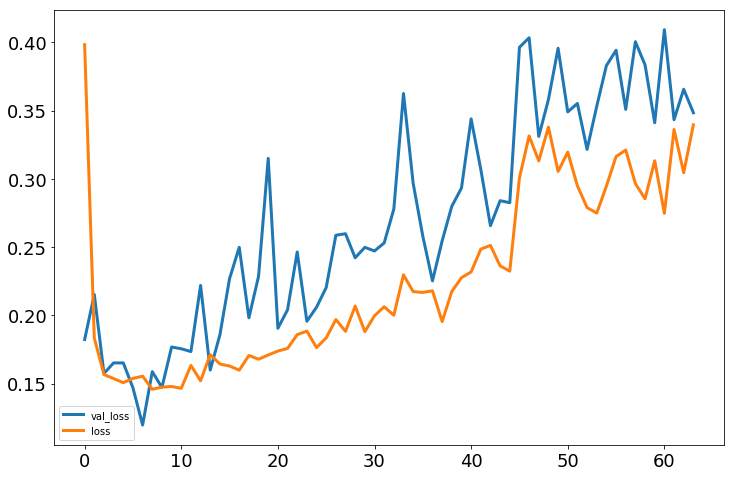

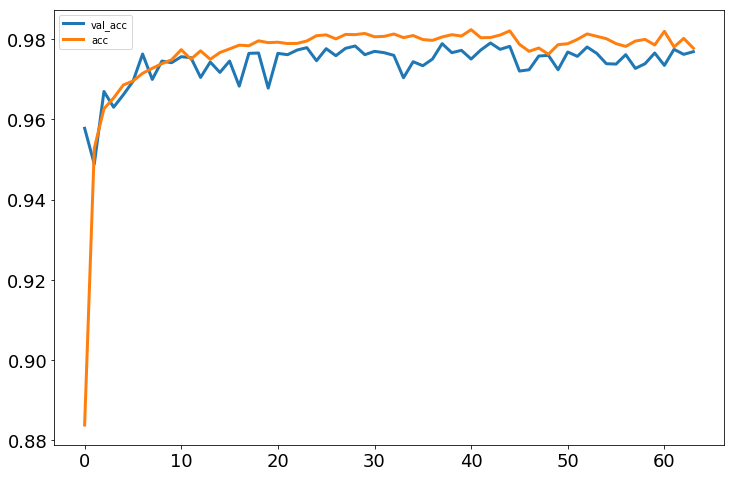

In [38]:
plot_kwargs = {'fontsize': 18, 'linewidth': 3, 'figsize': (12,8)}
pd.DataFrame(model.history.history)[['val_loss', 'loss']].plot(**plot_kwargs)
pd.DataFrame(model.history.history)[['val_acc', 'acc']].plot(**plot_kwargs)

In [41]:
keras_dnn_preds = np.argmax(model.predict(x_test), axis=1)
print('accuracy {:.2f}\nf1 micro score {:.2f}'.format(accuracy_score(y_test, keras_dnn_preds), f1_score(y_test, keras_dnn_preds, average='micro')))
pd.DataFrame(confusion_matrix(y_test, keras_dnn_preds))

accuracy 0.98
f1 micro score 0.98


,0,1,2,3,4,5,6,7,8,9
0,967,0,2,1,1,3,1,2,3,0
1,0,1124,2,2,0,2,1,1,3,0
2,4,3,997,4,7,2,4,5,6,0
3,0,0,4,989,0,8,0,6,2,1
4,0,2,1,1,961,0,2,1,2,12
5,0,0,0,5,1,877,3,4,2,0
6,3,3,1,1,17,9,919,0,5,0
7,1,3,9,5,2,0,0,1005,0,3
8,2,0,2,4,4,4,3,1,952,2
9,4,3,1,6,10,4,0,5,3,973


# Discussion
 - All ML methods are prone to overfitting, but DNNs are often more so. 
 - It is a different paradigm for approaching ML. We do not look to impose a function and learn __THE__ mapping from x to y. Instead just try to learn __A__ mapping from x to y. 
 - We have just scratched the surface of what deep nets can do. There are very powerful. However, in my humble opinion, most real-world problems are not this well posed and may not be so suited to deep nets.